In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [30]:
import torch

def check_gpu_availability():
    if torch.cuda.is_available():
        print("GPU is available!")
        # Additional information about the GPU
        gpu_count = torch.cuda.device_count()
        current_gpu_name = torch.cuda.get_device_name(0)
        print(f"Number of GPUs: {gpu_count}")
        print(f"Current GPU: {current_gpu_name}")
    else:
        print("GPU is not available. Running on CPU.")

# Call the function to check GPU availability
check_gpu_availability()

GPU is not available. Running on CPU.


In [31]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
print(device)

cpu


In [4]:
num_epochs= 10
batch_size=4
learning_rate=0.001

In [5]:
transform= transforms.Compose(
[
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [6]:
#our dataset
train_dataset= torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 69731977.13it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
test_dataset= torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [51]:
print(type(train_dataset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [8]:
train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [9]:
test_loader= torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [52]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [10]:
classes=('plane','car','bird','cat',
         'deer','dog','frog','horse','ship','truck')

In [11]:
#testing
def imshow(img):
    img = img / 2 +0.5 #unnormalize the image
    npimg= img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

In [12]:
from PIL import Image
import torch
from IPython.display import display

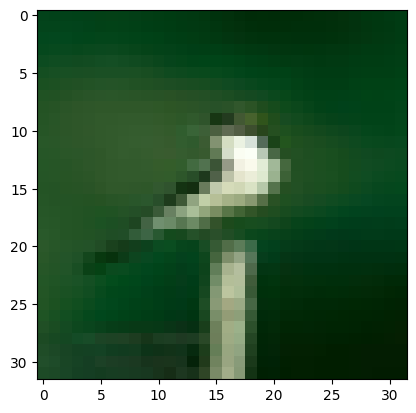

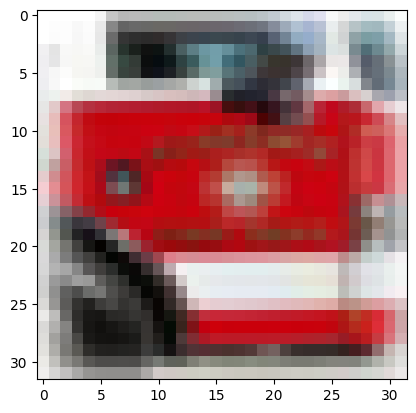

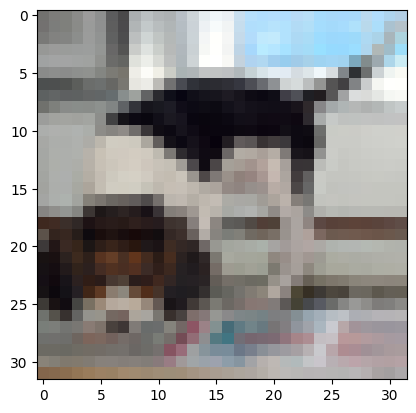

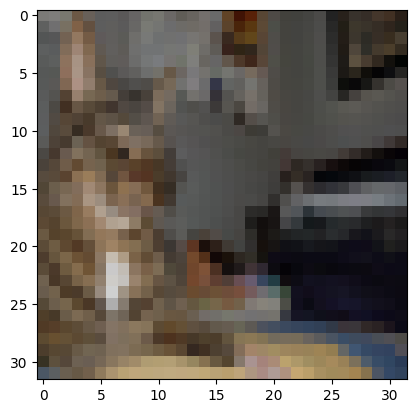

In [13]:
#get some random training images
#dataiter=iter(train_loader)
#images,labels= dataiter.next()
#the above methods are depricated in pytorch 1.7 and newer
#we can now simply iterate over the trainloader with a for loop
%matplotlib inline
po=0;
for images,labels in train_loader:
    #imshow(torchvision.utils.make_grid(images))
    for i in images:

        i=i/2+0.5
        image_array = i.numpy()
        image_array = np.transpose(image_array, (1, 2, 0))
        plt.imshow(image_array)
        plt.show()


    break;



In [14]:
print(labels)

tensor([2, 9, 5, 3])


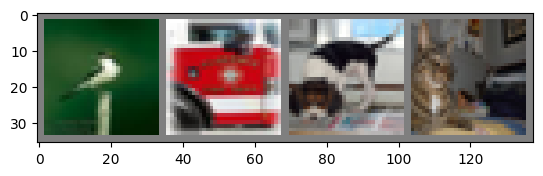

In [15]:
#show images
imshow(torchvision.utils.make_grid(images))

In [16]:
print(images.shape)

torch.Size([4, 3, 32, 32])


In [17]:
conv1= nn.Conv2d(3,6,5)
pool= nn.MaxPool2d(2,2)
conv2= nn.Conv2d(6,16,5)

In [18]:
newimages = conv1(images)

In [19]:
print(type(newimages))
print(newimages.shape)

<class 'torch.Tensor'>
torch.Size([4, 6, 28, 28])


In [20]:
newimages= pool(newimages)
print(type(newimages))
print(newimages.shape)

<class 'torch.Tensor'>
torch.Size([4, 6, 14, 14])


In [21]:
newimages= conv2(newimages)
print(newimages.shape)

torch.Size([4, 16, 10, 10])


In [22]:
newimages=pool(newimages)

print(newimages.shape)


torch.Size([4, 16, 5, 5])


In [23]:
conv3= nn.Conv2d(16,3,2)

In [24]:
crazyimages= conv3(newimages)

In [25]:
print(crazyimages.shape)

torch.Size([4, 3, 4, 4])


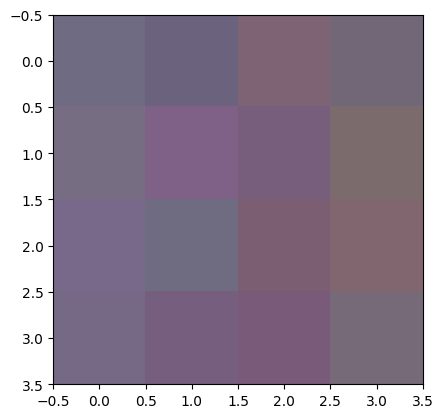

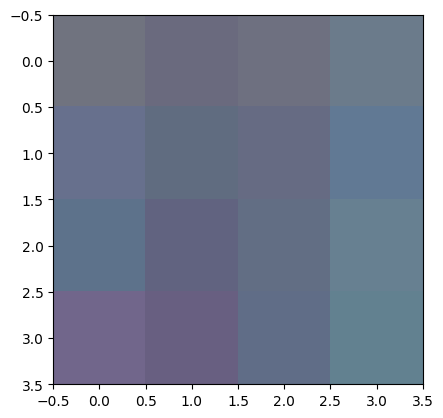

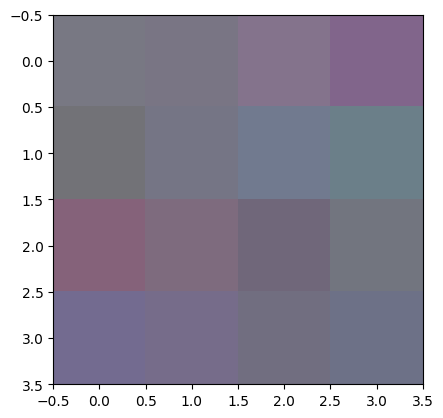

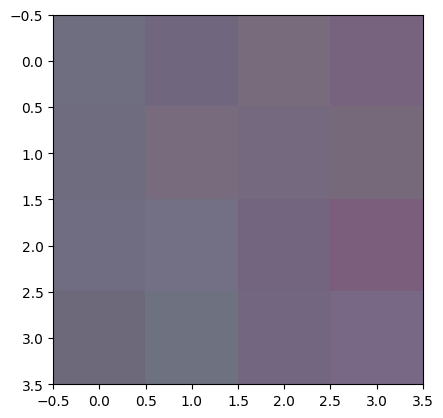

In [26]:
for i in crazyimages:

        i=i/2+0.5
        image_array = i.detach().numpy()
        image_array = np.transpose(image_array, (1, 2, 0))
        plt.imshow(image_array)
        plt.show()


In [27]:
#let us now build our model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        #first conv layer
        self.conv1 = nn.Conv2d(3,6,5)
        #self.pool(kernel_size, stride)
        self.pool= nn.MaxPool2d(2,2)
        self.conv2= nn.Conv2d(6,16,5)
        #self.fc1= nn.linear(input size, output size)
        self.fc1=nn.Linear(16*5*5, 120)
        #the input size must be the same as the previous output size
        self.fc2=nn.Linear(120, 84)
        #the output size here should be the same as the number of calsses
        self.fc3=nn.Linear(84, 10)

    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        #now we need to flatten our tensor to pass it to fc1
        x= x.view(-1, 16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x;

In [32]:
model = ConvNet().to(device)

In [33]:
criterion= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(), lr=learning_rate)

In [34]:
n_total_steps= len(train_loader)
for epoch in range (num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #origin shape: [4,3,32,32]= 4,3,1024
        #input layer" 3 input channels 6 output channels 5 kernel size
        images=images.to(device)
        labels= labels.to(device)

        #forward pass
        outputs = model(images)
        loss=criterion(outputs, labels)


        #backkward and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%2000==0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}{n_total_steps}], Loss= {loss.item():.4f}')

print('finished')

Epoch [1/10], Step [200012500], Loss= 2.2513
Epoch [1/10], Step [400012500], Loss= 2.3112
Epoch [1/10], Step [600012500], Loss= 2.3076
Epoch [1/10], Step [800012500], Loss= 2.2659
Epoch [1/10], Step [1000012500], Loss= 2.3380
Epoch [1/10], Step [1200012500], Loss= 2.2157
Epoch [2/10], Step [200012500], Loss= 1.9968
Epoch [2/10], Step [400012500], Loss= 2.1645
Epoch [2/10], Step [600012500], Loss= 2.5555
Epoch [2/10], Step [800012500], Loss= 2.3785
Epoch [2/10], Step [1000012500], Loss= 2.0235
Epoch [2/10], Step [1200012500], Loss= 2.0822
Epoch [3/10], Step [200012500], Loss= 1.9759
Epoch [3/10], Step [400012500], Loss= 1.4173
Epoch [3/10], Step [600012500], Loss= 1.5053
Epoch [3/10], Step [800012500], Loss= 1.1212
Epoch [3/10], Step [1000012500], Loss= 1.4334
Epoch [3/10], Step [1200012500], Loss= 2.0237
Epoch [4/10], Step [200012500], Loss= 1.3823
Epoch [4/10], Step [400012500], Loss= 0.7573
Epoch [4/10], Step [600012500], Loss= 2.1212
Epoch [4/10], Step [800012500], Loss= 1.3385
Epoc

In [35]:
#let us evaluate the model
with torch.no_grad():
    n_correct= 0 ;
    n_samples=0;
    n_class_correct= [0 for i in range(10)]
    n_class_samples= [0 for i in range(10)]
    for images, labels in test_loader:
        images= images.to(device)
        labels=labels.to(device)
        outputs= model(images)
        #max returns (value,index)
        _,predicted=torch.max(outputs,1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range (batch_size):
            label = labels[i]
            pred= predicted [i]
            if (label== pred):
                n_class_correct[label] +=1
            n_class_samples[label] +=1
    acc=100.0*n_correct / n_samples
    print(f'Accuracy of the network is {acc} %')

    for i in range (10):
        acc= 100.0*n_class_correct[i]/n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network is 58.32 %
Accuracy of plane: 71.5 %
Accuracy of car: 71.5 %
Accuracy of bird: 46.9 %
Accuracy of cat: 31.0 %
Accuracy of deer: 47.5 %
Accuracy of dog: 48.3 %
Accuracy of frog: 69.4 %
Accuracy of horse: 71.8 %
Accuracy of ship: 63.2 %
Accuracy of truck: 62.1 %


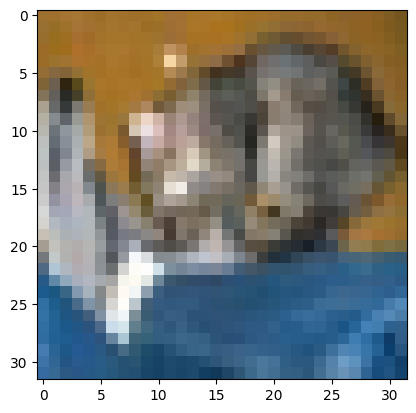

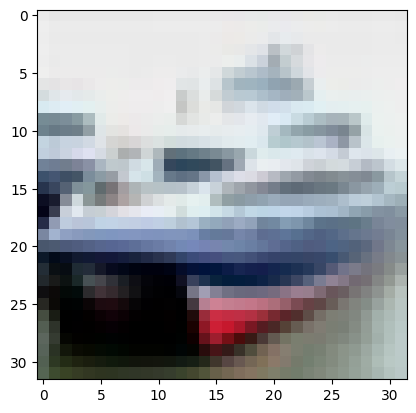

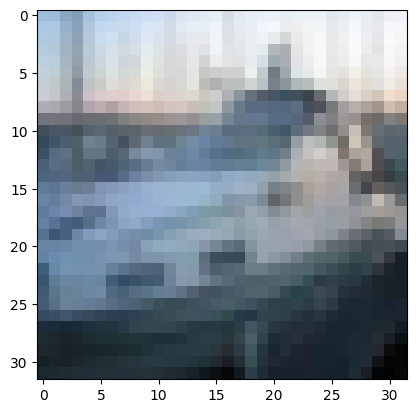

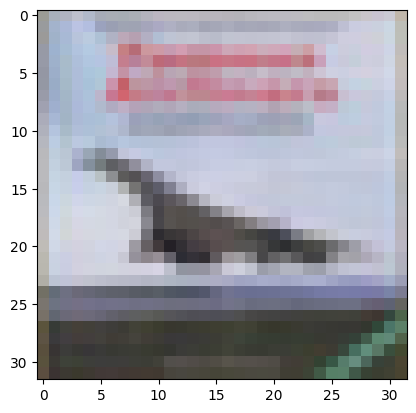

In [36]:
for test_images, test_labels in test_loader:
    #imshow(torchvision.utils.make_grid(images))
    for i in test_images:

        i=i/2+0.5
        image_array = i.numpy()
        image_array = np.transpose(image_array, (1, 2, 0))
        plt.imshow(image_array)
        plt.show()


    break;

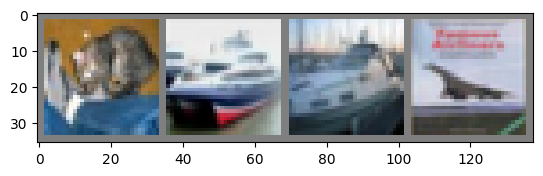

In [37]:
#show images
imshow(torchvision.utils.make_grid(test_images))

In [38]:
classes=('plane','car','bird','cat',
         'deer','dog','frog','horse','ship','truck')
print(test_labels)

tensor([3, 8, 8, 0])


In [39]:
test_output= model(test_images)

In [40]:
print(test_output)

tensor([[-0.6509, -3.2074,  0.5404,  2.9267, -0.1063,  1.5462,  0.6903, -0.2926,
         -1.5476, -1.9767],
        [ 5.2542,  5.0683, -1.0497, -3.1581, -2.3724, -5.3327, -3.9005, -5.0524,
          6.9453,  4.4902],
        [ 2.9784,  2.9268, -0.5796, -1.3409, -1.7115, -3.0654, -2.2297, -2.6667,
          3.8774,  2.0890],
        [ 4.7833,  1.0929,  0.9733, -1.5383, -0.6876, -3.8990, -2.2019, -3.1277,
          4.4379,  0.8570]], grad_fn=<AddmmBackward0>)


In [42]:
indexedOutput= torch.max(test_output,1)
print(indexedOutput)

torch.return_types.max(
values=tensor([2.9267, 6.9453, 3.8774, 4.7833], grad_fn=<MaxBackward0>),
indices=tensor([3, 8, 8, 0]))


In [43]:
print(type(indexedOutput))

<class 'torch.return_types.max'>


In [45]:
indexedOutput[1]

tensor([3, 8, 8, 0])

In [46]:
npp= indexedOutput[1].numpy()

In [47]:
npp

array([3, 8, 8, 0])

In [48]:
for i in npp:
  print(i)

3
8
8
0


In [49]:
results=[]
for i in npp:
  results.append(classes[i])

In [50]:
print(results)

['cat', 'ship', 'ship', 'plane']
